# Unsupervised Analysis Project
> *By Team 13: Jack Daoud, Natalia Gomez Aycardi, Selin Immel*
>
> *February 22nd, 2021*


<b><font size="+1"><center>Windows or Mac?</center></font></b>

<img src = './_images/design/windows-mac-logo.png' width = 350>

Countless consumers have pondered this question when preparing to buy a new computer. As a result, Apple (AAPL) and Microsoft (MSFT) have been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question. Both firms have commissioned research and analysis teams to study aspects such as system architecture, security, and overall performance.

Recently, Apple has decided to approach this question from the perspective of the Big Five personality traits as well as the Hult DNA. As such, your team has been commissioned to run an analysis on these factors.

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<b><font size="+1"><center>Big Five</center></font></b>

According to Rothmann & Coetzer, "researchers agree that almost all personality measures could be categorized according to the five-factor model of personality", which is also referred to as the big five personality dimensions (2003). 

This theory uses semantic associations in order to describe aspects of a humans personality. For example, someone who is described as "the life of a party" can be categorized as *extroverted*. This is one of the the big five dimensions, which are also known as the OCEAN model:

1. **O**penness to experience (inventive/curious vs. consistent/cautious)
2. **C**onscientiousness (efficient/organized vs. easy-going/careless)
3. **E**xtroversion (outgoing/energetic vs. solitary/reserved)
4. **A**greeableness (friendly/compassionate vs. challenging/detached)
5. **N**euroticism (sensitive/nervous vs. secure/confident)

<img src = "./_images/design/big_five.png" width = 350>

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<b><font size="+1"><center>Hult DNA</center></font></b>

The Hult DNA is a set of aspirations for the professional development of global minded business students as well as a tool to assist the alignment of their skills with future employers needs. "The foundation of the model is an extensive study by Hult Labs of over 100 of the world’s leading employers, supplemented by research from Hult and Ashridge researchers and data from Burning Glass Technologies that identify the skill gaps that keep job seekers and employers apart" (Hult, 2018).

The Hult DNA encompasses three critical competencies:

<img src = "./_images/design/hult_dna.png" width = 550>

Each competency is described by employers in terms of 9 specific behavioral skills that can be measured and developed:

<img src = "./_images/design/hult_dna_components.png" width = 550>

<br>

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<br>

# Setup

<b><font size="+1">Packages, Data, & User-defined Functions</font></b>

In [1]:
# Packages, data, & user-defined functions

########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
import re


from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from sklearn.manifold      import TSNE           # t-SNE
from sklearn.datasets      import load_digits    # digits dataset



########################################
# loading data and setting display options
########################################
# loading data
df         = pd.read_excel('./_data/survey_data.xlsx')
country_df = pd.read_csv('./_data/country-and-continent-codes-list.csv')

# separate survey data into 3 sets
big5_df         = df.iloc[:, 1:51]            # big five survey questions
hult_df         = df.iloc[:, 51:72]           # hult dna survey questions
demographics_df = df.iloc[:, 72:79]           # respondents demographic data
country_df      = country_df.iloc[:, [0,2]]   # contients & country data


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
# User-defined functions


########################################
# pca_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch,
                colors  = None,
                x_label = "First principal component",
                y_label = "Second principal component"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
x_label      : x-label for PC 0, default "First principal component"
y_label      : y-label for PC 1, default "Second principal component"
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 219)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

    
    
    
    
########################################
# tsne_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# tsne_plotter
def tsne_plotter(bunch,
                 colors  = None,
                 x_label = "t-SNE feature 0",
                 y_label = "t-SNE feature 1"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in TSNE
colors       : color coding for target labels, default None
x_label      : x-label for t-SNE feature 0, default "t-SNE feature 0"
y_label      : y-label for t-SNE feature 1, default "t-SNE feature 1"
"""
    
    # INSTANTIATING a PCA object
    tsne = TSNE(random_state = 219)

    
    # FITTING and TRANSFORMING the data
    dataset_tsne = tsne.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_tsne[:, 0].min(), dataset_tsne[:, 0].max() + 1)
    plt.ylim(dataset_tsne[:, 1].min(), dataset_tsne[:, 1].max() + 1)

    
    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_tsne[i, 0],
                 dataset_tsne[i, 1],
                 str(bunch.target[i]),
                 color    = colors[bunch.target[i]],
                 fontdict = {'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()
    
    
    
    
    
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

# Wrangling & Cleaning

## Demographic Data

In [3]:
# Demographic data

# Rename columns for ease of reference
demographics_df.columns = ['Current Laptop', 
                           'Future Laptop', 
                           'Program',
                           'Age',
                           'Gender',
                           'Nationality',
                           'Ethnicity']

# Clean nationality column

# Capitalize all strings
demographics_df['Nationality'] = \
    demographics_df['Nationality'].str.capitalize()

# Loop over each row in the demographics dataframe
for index, column in demographics_df.iterrows():

    if 'and' in demographics_df.loc[index, 'Nationality'].lower() \
    or '/'   in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Mixed'    
    
    
    elif 'korea' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Korean'
   

    elif 'china' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Chinese'
      
    
    elif 'usa' in demographics_df.loc[index, 'Nationality'].lower(): 
        demographics_df.loc[index, 'Nationality'] = 'American'
    
    
    elif 'ecuador' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Ecuadorian'
    
    
    elif 'brazil' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Brazilian'
     
    
    elif 'india' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Indian'
     
    
    elif 'colombia' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Colombian'
     
    
    elif 'indonesia' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Indonesian'
     
    
    elif 'russia' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Russian'
      
    
    elif 'spain' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Spanish'

        
    elif 'germany' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'German'
        
        
    elif 'philippines' in demographics_df.loc[index, 'Nationality'].lower() \
    or 'filipino' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Filipino'
      
    
    elif 'nigeria' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Nigerian'
        
        
    elif 'canada' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Canadian'  
        
        
    elif 'peru' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Peruvian' 
       
    
    elif 'japan' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Japanese'         
    
    
    elif 'congo' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Congolese'          
        
 
    elif 'czech' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Czechian'
        
        
    elif 'dominican' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Dominican'
        

    elif 'mauritius' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Mauritian'   
        
        
    elif 'panama' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Panamanian'
        
        
# Replace "Windows laptop" with "Windows"
demographics_df['Current Laptop'].replace('Windows laptop',
                                          'Windows',
                                          inplace = True)

demographics_df['Future Laptop'].replace('Windows laptop',
                                         'Windows',
                                         inplace = True)

# Loop through each value in each row
for index, column in demographics_df.iterrows():
    
    # Substitute business analytics with shorthand
    demographics_df.loc[index, 'Program'] = \
        re.sub(r'Business Analytics', 'MsBA', demographics_df.loc[index, 'Program'])

    # Substitute disruptive innovation with shorthand    
    demographics_df.loc[index, 'Program'] = \
        re.sub(r'Disruptive Innovation', 'MDI', demographics_df.loc[index, 'Program'])

# Check cleaned data
#demographics_df

In [4]:
# Deal with continent aggreggation

#country_df

<br>
<br>

## Big Five Data

In [5]:
# Match questions with traits & rename columns

#############################
# Personality abbreviations
#############################
# EXT - Questions to measure Extroversion.
# AGR - Questions to measure Agreeableness
# CSN - Questions to measure Conscientiousness
# EST - Questions to measure Neuroticism
# OPN - Questions to measure Openness to Experience


# Create dictionary of questions to personality
questions_traits = {
    
    "Am the life of the party"                                   : 'EXT1',
    "Feel little concern for others"                             : 'AGR1',
    "Am always prepared"                                         : 'CSN1',
    "Get stressed out easily"                                    : 'EST1',
    "Have a rich vocabulary"                                     : 'OPN1',
    
    "Don't talk a lot"                                           : 'EXT2',
    "Am interested in people"                                    : 'AGR2',
    "Leave my belongings around"                                 : 'CSN2',
    "Am relaxed most of the time"                                : 'EST2',
    "Have difficulty understanding abstract ideas"               : 'OPN2',
    
    "Feel comfortable around people"                             : 'EXT3',
    "Insult people"                                              : 'AGR3',
    "Pay attention to details"                                   : 'CSN3',
    "Worry about things"                                         : 'EST3',
    "Have a vivid imagination"                                   : 'OPN3',
    
    "Keep in the background"                                     : 'EXT4',
    "Sympathize with others' feelings"                           : 'AGR4',
    "Make a mess of things"                                      : 'CSN4',
    "Seldom feel blue"                                           : 'EST4',
    "Am not interested in abstract ideas"                        : 'OPN4',
    
    "Start conversations"                                        : 'EXT5',
    "Am not interested in other people's problems"               : 'AGR5',
    "Get chores done right away"                                 : 'CSN5',
    "Am easily disturbed"                                        : 'EST5',
    "Have excellent ideas"                                       : 'OPN5',
    
    "Have little to say"                                         : 'EXT6',
    "Have a soft heart"                                          : 'AGR6',
    "Often forget to put things back in their proper place"      : 'CSN6',
    "Get upset easily"                                           : 'EST6',
    "Do not have a good imagination"                             : 'OPN6',
    
    "Talk to a lot of different people at parties"               : 'EXT7',
    "Am not really interested in others"                         : 'AGR7',
    "Like order"                                                 : 'CSN7',
    "Change my mood a lot"                                       : 'EST7',
    "Am quick to understand things"                              : 'OPN7',
    
    "Don't like to draw attention to myself"                     : 'EXT8',
    "Take time out for others"                                   : 'AGR8',
    "Shirk my duties"                                            : 'CSN8',
    "Have frequent mood swings"                                  : 'EST8',
    "Use difficult words"                                        : 'OPN8',
    
    "Don't mind being the center of attention"                   : 'EXT9',
    "Feel others' emotions"                                      : 'AGR9',
    "Follow a schedule"                                          : 'CSN9',
    "Get irritated easily"                                       : 'EST9',
    "Spend time reflecting on things"                            : 'OPN9',
    
    "Am quiet around strangers"                                  : 'EXT10',
    "Make people feel at ease"                                   : 'AGR10',
    "Am exacting in my work"                                     : 'CSN10',
    "Often feel blue"                                            : 'EST10',
    "Am full of ideas"                                           : 'OPN10'
}


# Rename columns
big5_df.rename(columns = questions_traits, inplace = True)

# Check cleaned data
# big5_df

In [6]:
# Identification of reversals


# positive questions that add to the trait
positive_questions = [ 
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # EXT 5
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # EST 8
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # AGR 6
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # CSN 6
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # OPN 7
]

# negative questions that substract from the trait
negative_questions = [ 
    'EXT2','EXT4','EXT6','EXT8','EXT10',                      # EXT 5
    'EST2','EST4',                                            # EST 2
    'AGR1','AGR3','AGR5','AGR7',                              # AGR 4
    'CSN2','CSN4','CSN6','CSN8',                              # CSN 4
    'OPN2','OPN4','OPN6',                                     # OPN 3
]


# dictionary of each question and its reversal
crosscheck_questions = {
    
    # Extroversion
    'EXT1' : 'EXT2',
    'EXT3' : 'EXT4',
    'EXT5' : 'EXT6',
    'EXT7' : 'EXT8',
    'EXT9' : 'EXT10',
    
    # Agreeableness
    'AGR2' : 'AGR1',
    'AGR4' : 'AGR3',
    'AGR6' : 'AGR5',
    'AGR8' : 'AGR7',
    
    # Conscientiousness
    'CSN1' : 'CSN2',
    'CSN3' : 'CSN4',
    'CSN5' : 'CSN6',
    'CSN7' : 'CSN8',
    
    # Neuroticism
    'EST1' : 'EST2',
    'EST4' : 'EST10',
    
    # Openness
    'OPN1' : 'OPN2',
    'OPN3' : 'OPN4',
    'OPN5' : 'OPN6'
    
}

In [7]:
# Check validity of survey responses & drop invalid ones



##############################################################################
# Flag invalid responses

# Loop over column names of Big 5 DF
for column_name in big5_df.columns:
    
    # Loop over keys and values of Crosscheck Questions dict
    for key, value in crosscheck_questions.items():
        
        # If column from DF is in the keys of the dict
        if column_name in key:
            
            # Create a new column of the key-value pair as a placeholder for flag
            big5_df[key + ' & ' + value] = 0
            
            # Loop over each row
            for index, column in big5_df.iterrows():
                
                # If the values in each column match
                if big5_df.loc[index, key] == big5_df.loc[index, value]:
                    
                    # Flag the row
                    big5_df.loc[index, key + ' & ' + value] = 1
    
    
    
##############################################################################
# Sum flags

# Save list of flag column names
#flag_columns = big5_df.iloc[:,50:].columns

# Print each flag column
#for flag in flag_columns:
#    print(f"big5_df['{flag}'] + \\")
    
# Sum the flags
big5_df['FLAG_SUM']=big5_df['EXT1 & EXT2'] + \
                    big5_df['CSN1 & CSN2'] + \
                    big5_df['EST1 & EST2'] + \
                    big5_df['OPN1 & OPN2'] + \
                    big5_df['AGR2 & AGR1'] + \
                    big5_df['EXT3 & EXT4'] + \
                    big5_df['CSN3 & CSN4'] + \
                    big5_df['OPN3 & OPN4'] + \
                    big5_df['AGR4 & AGR3'] + \
                    big5_df['EST4 & EST10'] + \
                    big5_df['EXT5 & EXT6'] + \
                    big5_df['CSN5 & CSN6'] + \
                    big5_df['OPN5 & OPN6'] + \
                    big5_df['AGR6 & AGR5'] + \
                    big5_df['EXT7 & EXT8'] + \
                    big5_df['CSN7 & CSN8'] + \
                    big5_df['AGR8 & AGR7'] + \
                    big5_df['EXT9 & EXT10']



##############################################################################
# Remove invalid survey responses

# There are a total of 18 validity checks in the form of reversal questions.

# If a respondent answers with identical scores for more than half of those
# questions (9 or more), then than respondents submission will be considered 
# invalid and they will be dropped from the analysis


# Check number of invalid responses
#len(big5_df.loc[big5_df['FLAG_SUM'] > 8, :])


# Drop invalid responses (5 in total) & flags
#big5_df = big5_df.loc[big5_df['FLAG_SUM'] < 9, :'OPN10']

In [8]:
# Big 5 score system adjustment, aggreggation, & scaling



##############################################################################
# Change scoring system from 1 through 5 to -2 through 2 depending on whether
# the question adds or substracts from each trait

# Positive scores
positive_scores = {1 : -2,
                   2 : -1,
                   3 :  0, 
                   4 :  1,
                   5 :  2}

# Negative scores
negative_scores = {1 :  2,
                   2 :  1,
                   3 :  0,
                   4 : -1,
                   5 : -2}

# Replace values in positive questions
big5_df[positive_questions] = \
    big5_df[positive_questions].replace(positive_scores)

# Replace values in negative questions
big5_df[negative_questions] = \
    big5_df[negative_questions].replace(negative_scores)



##############################################################################
# Aggreggate Big Five Scores

# Instantiate list of traits
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']

# Loop through each trait in the list of traits
for trait in traits:
    
    # Loop over the list of column names with the variable col
    # and add it to a new list if col containts one of the traits
    trait_cols = sorted([col for col in big5_df.columns if trait in col])
    
    # Sum each of the scores for each trait
    big5_df[trait] = big5_df[trait_cols].sum(axis=1)
    
    # Place aggreggated score for each trait in DF
    big5_df[trait]

    
    # Code for looping over column names is adapted from:
    # https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string    
    
# Extract aggregated data into separate DF
big5_agg = big5_df.iloc[:, -5:]



##############################################################################
# Scale Big Five Scores

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(big5_agg)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(big5_agg)


# converting scaled data into a DataFrame
big5_agg_scaled = pd.DataFrame(X_scaled)


# reattaching column names
big5_agg_scaled.columns = big5_agg.columns

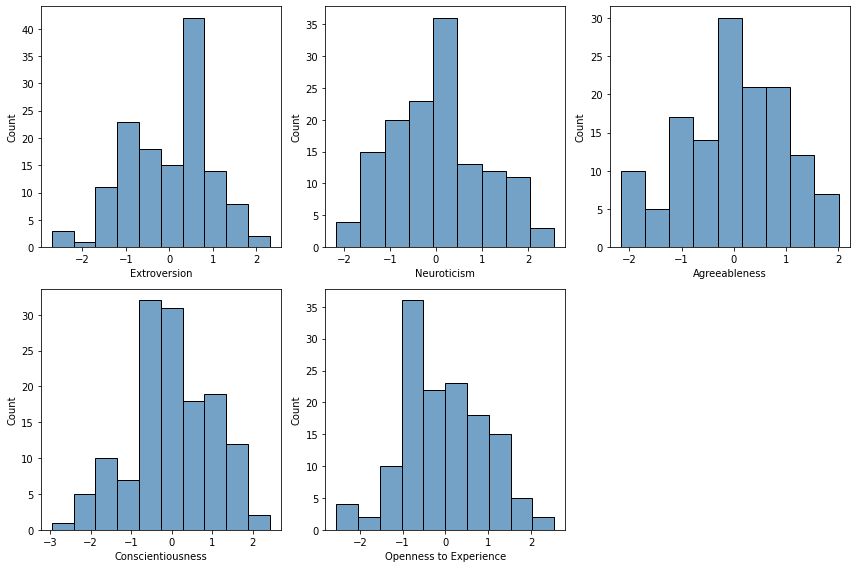

In [9]:
# Plot distributions of Big 5 results

# Rename columns for aesthetics
big5_abbreviations = {
    'EXT' : 'Extroversion',
    'EST' : 'Neuroticism',
    'AGR' : 'Agreeableness',
    'CSN' : 'Conscientiousness',
    'OPN' : 'Openness to Experience'
}

big5_agg_scaled.rename(columns = big5_abbreviations, inplace = True)

# Set figure size
fig, ax = plt.subplots(figsize = (12, 8))


# Initialize a counter
count = 0


# Loop to create visualizations
for col in big5_agg_scaled:

    # condition to break
    if count == 5:
        break
    
    # increase count
    count += 1
    
    # Prepare histograms
    plt.subplot(2, 3, count)
    sns.histplot(x = big5_agg_scaled[col], color = 'steelblue')
    
plt.tight_layout()
plt.savefig('./_images/analysis/big5_scaled_histograms.png')
plt.show()

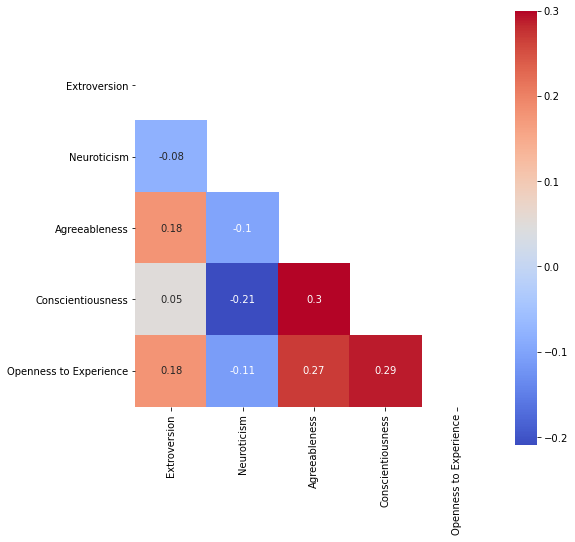

In [10]:
# Plot correlation heatmap of aggregated Big 5 results

# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = big5_agg_scaled.corr(method = 'pearson').round(2)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# creating a correlation heatmap
sns.heatmap(df_corr,
            cmap   = 'coolwarm',
            square = True,
            annot  = True,
            mask   = mask)


# saving and displaying the heatmap
plt.savefig('./_images/analysis/big5_heatmap.png')
plt.show()

<br><br>

## Hult DNA Data

In [11]:
# Drop duplicate columns

hult_df = hult_df[hult_df.columns.drop(list(hult_df.filter(regex='.1')))]

In [12]:
# Match questions with traits & rename columns

#############################
# Personality abbreviations
#############################
# TH - Questions to measure Thinking
# CM - Questions to measure Communicating
# TB - Questions to measure Team Building


# Create dictionary of questions to personality
questions_traits = {
"See underlying patterns in complex situations"                              : 'TH1',
"Don't  generate ideas that are new and different"                           : 'TH2',
"Demonstrate an awareness of personal strengths and limitations"             : 'TH3',
"Display a growth mindset"                                                   : 'TH4',
"Respond effectively to multiple priorities"                                 : 'CM1',
"Take initiative even when circumstances, objectives, or rules aren't clear" : 'CM2', # Not sure
"Encourage direct and open discussions"                                      : 'TB1',
"Listen carefully to others"                                                 : 'CM3',
"Don't persuasively sell a vision or idea"                                   : 'CM4',
"Build cooperative relationships"                                            : 'TB2',
"Work well with people from diverse cultural backgrounds"                    : 'TB3',
"Effectively negotiate interests, resources, and roles"                      : 'CM5',
"Can't rally people on the team around a common goal"                        : 'TB4',
"Translate ideas into plans that are organized and realistic"                : 'TH5',
"Resolve conflicts constructively"                                           : 'TB5',
"Seek and use feedback from teammates"                                       : 'TB6',
"Coach teammates for performance and growth"                                 : 'TB7',
"Drive for results"                                                          : 'CM6'  # Not sure
}


# positive questions that add to the trait
positive_questions = [ 
    'TH1', 'TH3', 'TH4', 'TH5',               # TH 4
    'CM1', 'CM2', 'CM3', 'CM5', 'CM6',         # CM 5
    'TB1', 'TB2', 'TB3', 'TB5', 'TB6', 'TB7'  # TB 6
]

# negative questions that substract from the trait
negative_questions = [ 
    'TH2',                                    # TH 1
    'CM4',                                    # CM 1
    'TB4',                                    # TB 1
]



# Rename columns
hult_df.rename(columns = questions_traits, inplace = True)

# Check cleaned data
# hult_df

In [13]:
# Hult DNA score system adjustment, aggreggation, & scaling


##############################################################################
# Change scoring system from 1 through 5 to -2 through 2 depending on whether
# the question adds or substracts from each trait

# Positive scores
positive_scores = {1 : -2,
                   2 : -1,
                   3 :  0, 
                   4 :  1,
                   5 :  2}

# Negative scores
negative_scores = {1 :  2,
                   2 :  1,
                   3 :  0,
                   4 : -1,
                   5 : -2}

# Replace values in positive questions
hult_df[positive_questions] = \
    hult_df[positive_questions].replace(positive_scores)

# Replace values in negative questions
hult_df[negative_questions] = \
    hult_df[negative_questions].replace(negative_scores)

##############################################################################
# Aggreggate Hult DNA Scores

# Instantiate list of traits
traits = ['TH', 'CM', 'TB']

# Loop through each trait in the list of traits
for trait in traits:
    
    # Loop over the list of column names with the variable col
    # and add it to a new list if col containts one of the traits
    trait_cols = sorted([col for col in hult_df.columns if trait in col])
    
    # Sum each of the scores for each trait
    hult_df[trait] = hult_df[trait_cols].sum(axis=1)
    
    # Place aggreggated score for each trait in DF
    hult_df[trait]

    
    # Code for looping over column names is adapted from:
    # https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string    
    
# Extract aggregated data into separate DF
hult_agg = hult_df.iloc[:, -3:]

##############################################################################
# Scale Hult DNA Scores

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_agg)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(hult_agg)


# converting scaled data into a DataFrame
hult_agg_scaled = pd.DataFrame(X_scaled)


# reattaching column names
hult_agg_scaled.columns = hult_agg.columns

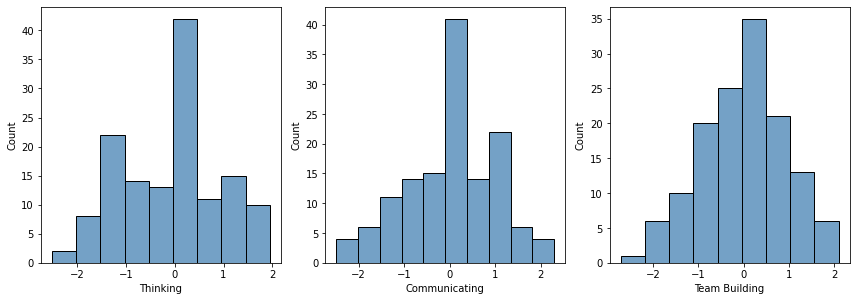

In [14]:
# Plot distributions of Hult DNA results

# Rename columns for aesthetics
hult_dna_abbreviations = {
    'TH' : 'Thinking',
    'CM' : 'Communicating',
    'TB' : 'Team Building'
}

hult_agg_scaled.rename(columns = hult_dna_abbreviations, inplace = True)

# Set figure size
fig, ax = plt.subplots(figsize = (12, 8))


# Initialize a counter
count = 0


# Loop to create visualizations
for col in hult_agg_scaled:

    # condition to break
    if count == 5:
        break
    
    # increase count
    count += 1
    
    # Prepare histograms
    plt.subplot(2, 3, count)
    sns.histplot(x = hult_agg_scaled[col], color = 'steelblue')
    
plt.tight_layout()
plt.savefig('./_images/analysis/hult_dna_scaled_histograms.png')
plt.show()

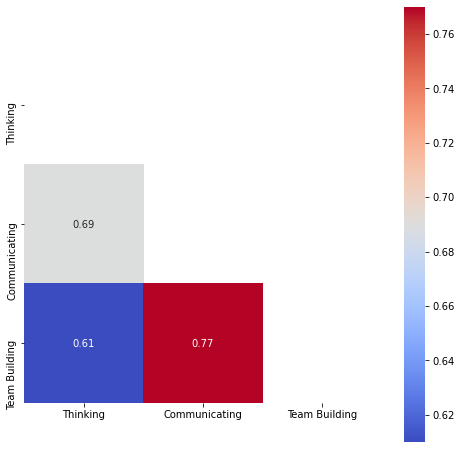

In [15]:
# Plot correlation heatmap of aggregated Hult DNA results

# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = hult_agg_scaled.corr(method = 'pearson').round(2)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# creating a correlation heatmap
sns.heatmap(df_corr,
            cmap   = 'coolwarm',
            square = True,
            annot  = True,
            mask   = mask)


# saving and displaying the heatmap
plt.savefig('./_images/analysis/hult_dna_heatmap.png')
plt.show()

<br><br>

## Merged Data

In [29]:
# Merge & export aggregated & scaled data from two surveys

# Merge
agg_scaled_df = pd.concat([big5_agg_scaled, hult_agg_scaled], axis = 1)

# Export as CSV
agg_scaled_df.to_csv('./_data/aggreggated_scaled_results.csv')

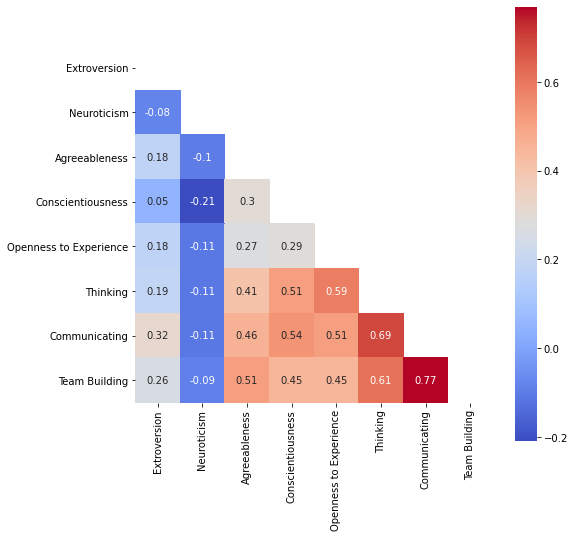

In [17]:
# Plot correlation heatmap of merged aggregated results


# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = agg_scaled_df.corr(method = 'pearson').round(2)


# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


# creating a correlation heatmap
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            mask = mask)


# saving and displaying the heatmap
plt.savefig('./_images/analysis/final_heatmap.png')
plt.show()

<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

# Modeling

PC 1 : 0.455
PC 2 : 0.126
PC 3 : 0.12
PC 4 : 0.097
PC 5 : 0.08
PC 6 : 0.056
PC 7 : 0.041
PC 8 : 0.025


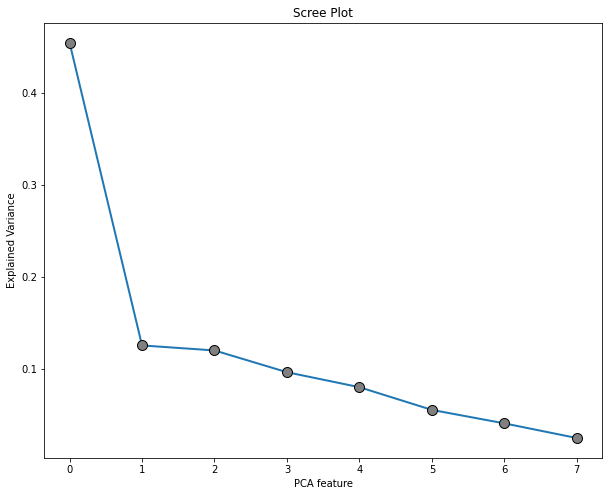

In [18]:
# Determine the number of Principal Components

# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit(agg_scaled_df)




# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")


    
    
# calling the scree_plot function
scree_plot(pca_object = pca)

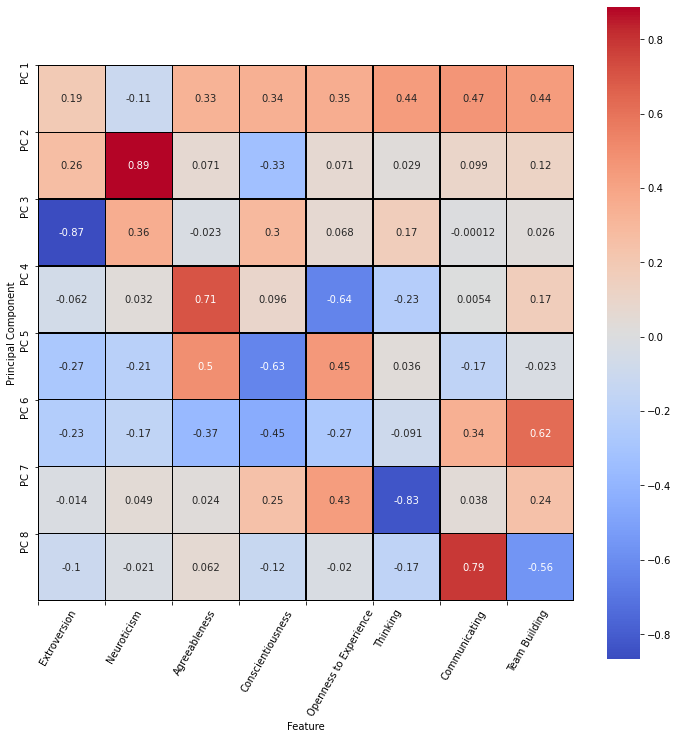

In [24]:
# Plot factor loadings

# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7],
           ["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6", "PC 7", "PC 8"])

plt.xticks(range(0, 8),
           agg_scaled_df.columns,
           rotation=60,
           ha='left')

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")

# saving the plot
plt.savefig('./_images/analysis/factor_loadings.png')

# displaying the plot
plt.show()



In [28]:
# Export PC Factor Loadings as Exce;

# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(agg_scaled_df.columns)


# checking the result
print(factor_loadings_df.iloc[:, :5])


# saving to Excel
factor_loadings_df.to_excel('./_data/factor_loadings.xlsx')

                               0         1         2         3         4
Extroversion            0.188212  0.263933 -0.867138 -0.061628 -0.273272
Neuroticism            -0.111239  0.887152  0.355161  0.031601 -0.206503
Agreeableness           0.326212  0.070608 -0.022959  0.706930  0.496242
Conscientiousness       0.343619 -0.327526  0.297266  0.095993 -0.633434
Openness to Experience  0.352928  0.070504  0.067761 -0.637130  0.450904
Thinking                0.437081  0.028878  0.166687 -0.228586  0.036442
Communicating           0.466753  0.099417 -0.000121  0.005376 -0.173305
Team Building           0.440748  0.123912  0.025735  0.167403 -0.022536


In [ ]:
# Apply labels to Principal Components

# naming each principal component
# factor_loadings_df.columns = ['Carnivores',                 # No Vegan, No Vege, No Indian
#                               'Veggie Inclusives',          # No Med, No ME, No Wine
#                               'Mediterranean Non-Drinkers', # Med, No Wine
#                               'Traditionalists',            # ME, No Wine
#                               'Vegans',                     # Vegan
#                               'Health Specialists']


# checking the result
# factor_loadings_df

In [ ]:
# # Customer-Level Personas

# # converting into a DataFrame 
# customer_pca = pd.DataFrame(customer_pca)


# # renaming columns
# customer_pca.columns = factor_loadings_df.columns


# # checking results
# customer_pca.iloc[:, :]

<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

# References

> Rothmann, S., & Coetzer, E. P. (2003). The big five personality dimensions and job performance. Sa Journal of Industrial Psychology, 29(1), 68–74.

> Hult (2018-19). Hult DNA Development Guide. Hult International. Business School.